In [1]:
import scipy.io
import pandas as pd

x = scipy.io.loadmat('SBJ01/SBJ01/S01/Train/trainData.mat')
data = pd.DataFrame(x['trainData'][1]).T
data

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,6.060894,2.020155,-2.471417,-6.335487,-8.651664,-9.208978,-8.527253,-7.334837,-6.054755,-4.663051,...,-4.949874,-3.000763,0.052352,3.695411,7.321965,10.175663,11.565624,11.422439,10.442608,9.612968
1,-22.619986,-19.652071,-15.642263,-11.212227,-6.964636,-3.551682,-1.496162,-0.835045,-1.097958,-1.605899,...,0.107718,-3.673522,-8.162715,-11.638025,-13.069181,-12.401001,-10.145221,-7.072012,-4.134705,-2.289782
2,7.226775,9.026947,9.526222,8.981895,8.062214,7.624712,8.218971,9.527496,10.419319,9.701370,...,1.643959,3.345670,5.157772,6.189734,5.827455,4.120317,1.678957,-0.816257,-3.019837,-4.768120
3,-2.097013,-4.875274,-7.269309,-9.029065,-10.046544,-10.300261,-9.946506,-9.392306,-8.896109,-8.059999,...,-9.851971,-8.949843,-7.883143,-7.033097,-6.468213,-6.081760,-5.761024,-5.309257,-4.390216,-2.787989
4,19.964323,19.624012,16.223104,9.835667,1.551697,-6.822431,-13.412330,-16.904324,-16.843220,-13.724347,...,11.340281,10.642915,9.067357,7.589876,7.055655,7.538763,8.504120,9.415252,9.937079,9.794128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.659203,2.588018,5.756881,8.365111,10.190948,11.356114,12.183657,13.071853,14.275414,15.634806,...,0.610413,-0.987364,-1.503714,-1.639211,-2.074256,-3.081018,-4.457056,-5.712995,-6.297417,-5.814818
1596,8.967686,3.156121,-2.587603,-7.048267,-9.424202,-9.630858,-8.387872,-6.823889,-5.811372,-5.590260,...,-2.024822,-6.018083,-9.945914,-12.498307,-12.762943,-10.699965,-7.178440,-3.531394,-0.885527,0.173455
1597,-13.445071,-10.586889,-5.408081,1.186841,7.763480,12.392667,13.262978,9.830499,3.478669,-3.096456,...,3.586265,4.009148,5.207397,7.102548,9.149606,10.722682,11.468576,11.343890,10.508514,9.263807
1598,5.004368,0.932540,-1.943087,-3.581613,-3.975639,-2.990930,-0.635156,2.669536,6.279947,9.837334,...,7.847618,8.767364,9.056504,8.818357,8.328036,7.897739,7.429546,6.296103,3.855014,0.254553


# How does the Wavelet Transform work?
* The Fourier Transform uses a series of sine-waves with different frequencies to analyze a signal. That is, a signal is represented through a linear combination of sine-waves. The Wavelet Transform uses a series of functions called wavelets, each with a different scale. The word wavelet means a small wave, and this is exactly what a wavelet is.
* The main difference is that the sine-wave is not localized in time (it stretches out from -infinity to +infinity) while a wavelet is localized in time. This allows the wavelet transform to obtain time-information in addition to frequency information.

* Since the Wavelet is localized in time, we can multiply our signal with the wavelet at different locations in time. We start with the beginning of our signal and slowly move the wavelet towards the end of the signal. This procedure is also known as a convolution. After we have done this for the original (mother) wavelet, we can scale it such that it becomes larger and repeat the process.

![title](Shema.png)

# CWT on sine wave

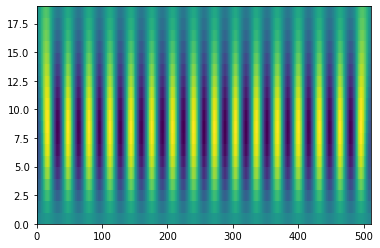

In [2]:
%matplotlib inline
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,20),'gaus1')
plt.pcolormesh(coef) # doctest: +SKIP
plt.show() # doctest: +SKIP

In [3]:
import scipy.io
import pandas as pd

testData = scipy.io.loadmat('SBJ01/SBJ01/S01/Test/testData.mat')
print(testData['testData'].T.shape)

trainData = scipy.io.loadmat("SBJ01/SBJ01/S01/Train/trainData.mat")
print(trainData['trainData'].T.shape)


(2400, 350, 8)
(1600, 350, 8)


In [4]:
singnalTrain = trainData['trainData'].T
signalTest = testData['testData'].T

In [65]:
singnalTrain.shape

(1600, 350, 8)

In [5]:
indexTrain = pd.read_csv('SBJ01/SBJ01/S01/Train/trainTargets.txt', header=None)
print(indexTrain)

      0
0     0
1     0
2     0
3     0
4     1
...  ..
1595  0
1596  0
1597  0
1598  0
1599  0

[1600 rows x 1 columns]


In [42]:
trainLabels = indexTrain.head(800)

In [49]:
print(trainLabels.shape)

(800, 1)


# Applying the CWT on the dataset and transforming the data to the right format
* Since each signal has eight components, each signal will also have eight scaleograms. So the next question to ask is, how do we feed this set of eight scaleograms into a Convolutional Neural Network? There are several options we could follow:

* Train a CNN for each component separately and combine the results of the eight CNN’s in some sort of an ensembling method. I suspect that this will generally result in a poorer performance since the inter dependencies between the different components are not taken into account.
* Concatenate the eight different signals into one long signal and apply the CWT on the concatenated signal. This could work but there will be discontinuities at location where two signals are concatenated and this will introduced noise in the scaleogram at the boundary locations of the component signals.
* Calculate the CWT first and thén concatenate the eight different CWT images into one and feed that into the CNN. This could also work, but here there will also be discontinuities at the boundaries of the CWT images which will feed noise into the CNN. If the CNN is deep enough, it will be able to distinguish between these noisy parts and actually useful parts of the image and choose to ignore the noise. But I still prefer option number four:
* Place the eight scaleograms on top of each other and create one single image with eight channels. What does this mean? Well, normally an image has either one channel (grayscale image) or three channels (color image), but our CNN can just as easily handle images with eight channels. The way the CNN works remains exactly the same, the only difference is that there will be three times more filters compared to an RGB image.

In [17]:
scales = range(1, 151)
waveletname = 'morl'
train_size = 800
test_size= 200

train_data_cwt = np.ndarray(shape=(train_size, 150, 150, 8))

for ii in range(0,train_size):
    if ii % 1000 == 0:
        print(ii)
    for jj in range(0,8):
        signal = singnalTrain[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:150]
        train_data_cwt[ii, :, :, jj] = coeff_

test_data_cwt = np.ndarray(shape=(test_size, 150, 150, 8))
for ii in range(0,test_size):
    if ii % 100 == 0:
        print(ii)
    for jj in range(0,8):
        signal = signalTest[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:150]
        test_data_cwt[ii, :, :, jj] = coeff_

labels_train = list(indexTrain)

x_trainCWT = train_data_cwt
y_trainCWT = list(labels_train[:train_size])
x_testCWT = test_data_cwt

0
0
100


In [62]:
print(x_trainCWT[0].T[0])
print(trainLabels.shape)

(150, 150)
(800, 1)


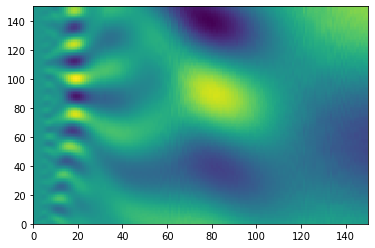

In [63]:
%matplotlib inline
import pywt
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
x = np.arange(512)
axs[0, 0].pcolormesh(x_trainCWT[0].T[0]) # doctest: +SKIP
axs[0, 1].pcolormesh(x_trainCWT[0].T[0]) # doctest: +SKIP
plt.show() # doctest: +SKIP

In [45]:
from keras.utils import to_categorical
labels = to_categorical(trainLabels)

print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [50]:
print(x_train.shape)
print(y_train.shape)

(536, 150, 150, 8)
(536, 2)


In [53]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(x_trainCWT, trainLabels, test_size=0.33, shuffle= True)
history = History()



img_x = 150
img_y = 150
img_z = 8
input_shape = (img_x, img_y, img_z)

num_classes = 2
batch_size = 10
num_classes = 2
epochs = 10

x_train = x_train.astype('float32')
x_test = x_testCWT.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)


model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_valid, y_valid),
          callbacks=[history])

train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))

ValueError: Error when checking target: expected dense_18 to have shape (2,) but got array with shape (1,)